# Neural Networks Sprint Challenge

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Nadam
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

## 1) Define the following terms:

- Neuron
- Input Layer
- Hidden Layer
- Output Layer
- Activation
- Backpropagation

### Neuron: 
The most fundamental unit of the neural network, a neuron is a single node that receives inputs and returns an output. A neuron is simply a set of inputs, set of weights, and an activation function.

### Input Layer:
The input layer is the layer that receives the data used for predictions. The input layer passes the data to the first hidden layer, where it is multiplied by that hidden layer's weights. 

### Hidden Layer:
The hidden layer is the bridge between the input and output layers. It transforms the data through its weightings.

### Output Layer:
This is the layer that actually returns the output or predictions from the neural network.

### Activation Function:
The activation function takes the ouput from the previous layer and maps those values to a range before outputting values to the next node

### Backpropogation:
The backpropogation is an optimization algorithm that adjusts the weights of the neurons in a neural net through calculating the gradient of the loss function (errors of predictions).

## 2) Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 1  | 1  | 1  | 1 |
| 1  | 0  | 1  | 0 |
| 0  | 1  | 1  | 0 |
| 0  | 0  | 1  | 0 |

In [45]:
class Perceptron_classifier(object): 
    
     def __init__(self,n_inputs, threshold=1000, learning_rate=.0001):
        self.threshold = threshold 
        self.learning_rate = learning_rate
        self.weights = np.zeros(n_inputs+1)
    
     def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:])
        if summation > 0:
            activation = 1
        else:
            activation = 0
        return activation
    
     def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * prediction
                self.weights[0] += self.learning_rate * (label - prediction)
                
target_labels = np.array([[1],[0],[0],[0]])
                
input_array = np.array([[1,1,1],
                 [1,0,1],
                 [0,1,1],
                 [0,0,1]])

perceptron = Perceptron_classifier(n_inputs=3)

perceptron.train(training_inputs=input_array, labels=target_labels) 

print ('weights:', perceptron.weights) 

weights: [0.1 0.  0.  0. ]


## 3) Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. 
- Your network must have one hidden layer. 
- You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
- Train your model on the Heart Disease dataset from UCI:

[Github Dataset](https://github.com/ryanleeallred/datasets/blob/master/heart.csv)

[Raw File on Github](https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv)


In [46]:
heart_disease_data = pd.read_csv('https://github.com/ryanleeallred/datasets/raw/master/heart.csv')

y = heart_disease_data['target'].values
X = heart_disease_data.drop(columns=['target']).values
y = y.reshape(-1,1)

print ('inputs:', X.shape)
print ('labels:', y.shape)

inputs: (303, 13)
labels: (303, 1)


In [47]:
seed = np.random.seed(69420)

In [48]:
class NN(object):
    def __init__(self):
        self.inputs = 13
        self.L1Nodes = 16
        self.L2Nodes = 16
        self.outputNodes = 1

        # Initlize Weights
        self.L1_weights = np.random.randn(self.inputs, self.L1Nodes) # (784x16)
        self.L2_weights = np.random.randn(self.L1Nodes, self.L2Nodes) # (16x16)
        self.output_weights = np.random.randn(self.L2Nodes, self.outputNodes) # (16x10)

    def feed_forward(self, X):
        self.activated_L1 = self.sigmoid(np.dot(X, self.L1_weights)) 
        self.activated_L2 = self.sigmoid(np.dot(self.activated_L1, self.L2_weights))
        self.activated_output = self.sigmoid(np.dot(self.activated_L2, self.output_weights))
        return self.activated_output
        
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def backward(self, X, y, output):
        self.output_error = y - output # error in this layer
        self.output_delta = self.output_error*self.sigmoidPrime(output) # apply derivative of sigmoid to error
        
        self.L2_error = self.output_delta.dot(self.output_weights.T) 
        self.L2_delta = self.L2_error*self.sigmoidPrime(self.activated_L2)
        
        self.L1_error = self.L2_delta.dot(self.L2_weights.T) 
        self.L1_delta = self.L1_error*self.sigmoidPrime(self.activated_L1)
        
        
        self.L1_weights += X.T.dot(self.L1_delta) 
        self.L2_weights += self.activated_L1.T.dot(self.L2_delta)
        self.output_weights += self.activated_L2.T.dot(self.output_delta)
        
    def train (self, X, y):
        output = self.feed_forward(X)
        self.backward(X, y, output)
        
        

model = NN()
epochs=1000



for i in range(epochs): 
    print('''
⊂_ヽ''', 'EPOCH', i+1, '''
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 ''')
    
    print("Loss: \n" + str(np.mean(np.square(y - model.feed_forward(X)))))
    print("\n")
    print("\n")
    model.train(X, y)


⊂_ヽ EPOCH 1 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.2762943025840328





⊂_ヽ EPOCH 2 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.2627917676850609





⊂_ヽ EPOCH 3 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 4 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 5 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 6 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ


⊂_ヽ EPOCH 192 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 193 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 194 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 195 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 196 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 197 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ 

Loss: 
0.5445544554455446





⊂_ヽ EPOCH 375 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 376 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 377 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 378 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 379 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 380 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 

Loss: 
0.5445544554455446





⊂_ヽ EPOCH 563 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 564 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 565 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 566 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 567 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 568 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 


⊂_ヽ EPOCH 756 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 757 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 758 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 759 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 760 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 761 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ 

Loss: 
0.5445544554455446





⊂_ヽ EPOCH 953 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 954 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 955 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 956 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 957 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 <　⌒ヽ ᴬ
　　　/ 　 へ＼ ᴮ
　　 /　　/　＼＼ ᵁ
　　 ﾚ　ノ　　 ヽ_つ ᴸ 
　　/　/ ᴼ
　 /　/| ᵁ
　(　(ヽ ˢ
　|　|、＼
　| 丿 ＼ ⌒)
　| |　　) /
`ノ )　 ᴸﾉ
(_／ 
 
Loss: 
0.5445544554455446





⊂_ヽ EPOCH 958 
　 ＼＼ ＿
　　 ＼(　•_•) ᶠ
　　　 

## 4) Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy. 

- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network. 
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- When hyperparameter tuning, show you work by adding code cells for each new experiment. 
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

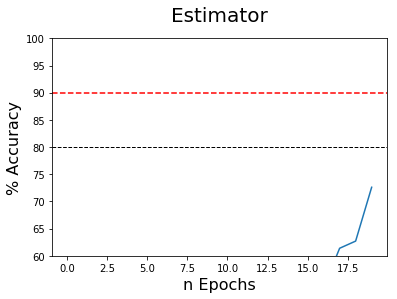

Baseline Cross Validation Score: 0.55775578 used {'batch_size': 20, 'epochs': 20}



In [53]:
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# instantiate model obj
model = KerasClassifier(build_fn=create_model, verbose=0)


batch_size = [20]
epochs = [20]
param_grid = dict(batch_size=batch_size, epochs=epochs)
c_v = StratifiedKFold(n_splits=4,
                      shuffle=True,
                      random_state=seed) 


cv_grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    n_jobs=-1, 
                    cv=c_v)


xval_result = cv_grid.fit(X, y)

acc = [x*100 for x in xval_result.best_estimator_.model.history.history['acc']]
fig, ax = plt.subplots()
ax.plot(acc)
ax.set_xlabel('n Epochs', fontsize=16)
ax.set_ylabel('% Accuracy', fontsize=16)
ax.set_ylim(60,100)
ax.axhline(80, color='k', linestyle='--', linewidth=1) 
ax.axhline(90, color='r', linestyle='--')
plt.title('Estimator', fontsize=20, y=1.05)
plt.show()

print(f"Baseline Cross Validation Score: {xval_result.best_score_:.8f} used {xval_result.best_params_}\n")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
303/303 [==============================] - 0s 490us/step - loss: 4.5303 - acc: 0.5116
Epoch 2/20
303/303 [==============================] - 0s 28us/step - loss: 4.2455 - acc: 0.5083
Epoch 3/20
303/303 [==============================] - 0s 35us/step - loss: 3.8635 - acc: 0.4719
Epoch 4/20
303/303 [==============================] - 0s 29us/step - loss: 3.5883 - acc: 0.4587
Epoch 5/20
303/303 [==============================] - 0s 29us/step - loss: 3.1625 - acc: 0.4455
Epoch 6/20
303/303 [==============================] - 0s 28us/step - loss: 2.7420 - acc: 0.4389
Epoch 7/20
303/303 [==============================] - 0s 29us/step - loss: 2.2516 - acc: 0.4422
Epoch 8/20
303/303 [==============================] - 0s 33us/step - loss: 1.8062 - acc: 0.4554
Epoch 9/20
303/303 [==============================] - 0s 27us/step - loss: 1.4449 - acc: 0.5017
Epoch 10/20
303

NameError: name 'xval_result' is not defined

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=1)

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

batch_size = [20]
epochs = [100]


param_grid = dict(batch_size=batch_size, 
                  epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                    n_jobs=1, cv=kfold)

grid_result = grid.fit(X, y)

Epoch 1/100
202/202 [==============================] - 0s 2ms/step - loss: 7.2609 - acc: 0.5446
Epoch 2/100
202/202 [==============================] - 0s 39us/step - loss: 7.2609 - acc: 0.5446
Epoch 3/100
202/202 [==============================] - 0s 44us/step - loss: 7.2609 - acc: 0.5446
Epoch 4/100
202/202 [==============================] - 0s 37us/step - loss: 7.2609 - acc: 0.5446
Epoch 5/100
202/202 [==============================] - 0s 40us/step - loss: 7.2609 - acc: 0.5446
Epoch 6/100
202/202 [==============================] - 0s 36us/step - loss: 7.2609 - acc: 0.5446
Epoch 7/100
202/202 [==============================] - 0s 41us/step - loss: 7.2609 - acc: 0.5446
Epoch 8/100
202/202 [==============================] - 0s 36us/step - loss: 7.2609 - acc: 0.5446
Epoch 9/100
202/202 [==============================] - 0s 45us/step - loss: 7.2609 - acc: 0.5446
Epoch 10/100
202/202 [==============================] - 0s 39us/step - loss: 7.2609 - acc: 0.5446
Epoch 11/100
202/202 [========

202/202 [==============================] - 0s 43us/step - loss: 7.2609 - acc: 0.5446
Epoch 85/100
202/202 [==============================] - 0s 42us/step - loss: 7.2609 - acc: 0.5446
Epoch 86/100
202/202 [==============================] - 0s 47us/step - loss: 7.2609 - acc: 0.5446
Epoch 87/100
202/202 [==============================] - 0s 41us/step - loss: 7.2609 - acc: 0.5446
Epoch 88/100
202/202 [==============================] - 0s 37us/step - loss: 7.2609 - acc: 0.5446
Epoch 89/100
202/202 [==============================] - 0s 42us/step - loss: 7.2609 - acc: 0.5446
Epoch 90/100
202/202 [==============================] - 0s 36us/step - loss: 7.2609 - acc: 0.5446
Epoch 91/100
202/202 [==============================] - 0s 36us/step - loss: 7.2609 - acc: 0.5446
Epoch 92/100
202/202 [==============================] - 0s 38us/step - loss: 7.2609 - acc: 0.5446
Epoch 93/100
202/202 [==============================] - 0s 37us/step - loss: 7.2609 - acc: 0.5446
Epoch 94/100
202/202 [===========

202/202 [==============================] - 0s 37us/step - loss: 0.4576 - acc: 0.7772
Epoch 67/100
202/202 [==============================] - 0s 41us/step - loss: 0.4573 - acc: 0.7723
Epoch 68/100
202/202 [==============================] - 0s 50us/step - loss: 0.4677 - acc: 0.7772
Epoch 69/100
202/202 [==============================] - 0s 50us/step - loss: 0.4623 - acc: 0.7822
Epoch 70/100
202/202 [==============================] - 0s 37us/step - loss: 0.4550 - acc: 0.7822
Epoch 71/100
202/202 [==============================] - 0s 45us/step - loss: 0.4717 - acc: 0.7426
Epoch 72/100
202/202 [==============================] - 0s 36us/step - loss: 0.4531 - acc: 0.7871
Epoch 73/100
202/202 [==============================] - 0s 42us/step - loss: 0.4815 - acc: 0.7624
Epoch 74/100
202/202 [==============================] - 0s 39us/step - loss: 0.4492 - acc: 0.7772
Epoch 75/100
202/202 [==============================] - 0s 46us/step - loss: 0.4769 - acc: 0.7574
Epoch 76/100
202/202 [===========

202/202 [==============================] - 0s 44us/step - loss: 8.7772 - acc: 0.4554
Epoch 49/100
202/202 [==============================] - 0s 40us/step - loss: 8.7772 - acc: 0.4554
Epoch 50/100
202/202 [==============================] - 0s 39us/step - loss: 8.7772 - acc: 0.4554
Epoch 51/100
202/202 [==============================] - 0s 39us/step - loss: 8.7772 - acc: 0.4554
Epoch 52/100
202/202 [==============================] - 0s 42us/step - loss: 8.7772 - acc: 0.4554
Epoch 53/100
202/202 [==============================] - 0s 43us/step - loss: 8.7772 - acc: 0.4554
Epoch 54/100
202/202 [==============================] - 0s 43us/step - loss: 8.7772 - acc: 0.4554
Epoch 55/100
202/202 [==============================] - 0s 39us/step - loss: 8.7772 - acc: 0.4554
Epoch 56/100
202/202 [==============================] - 0s 46us/step - loss: 8.7772 - acc: 0.4554
Epoch 57/100
202/202 [==============================] - 0s 37us/step - loss: 8.7772 - acc: 0.4554
Epoch 58/100
202/202 [===========

303/303 [==============================] - 0s 39us/step - loss: 7.2609 - acc: 0.5446
Epoch 31/100
303/303 [==============================] - 0s 39us/step - loss: 7.2609 - acc: 0.5446
Epoch 32/100
303/303 [==============================] - 0s 39us/step - loss: 7.2609 - acc: 0.5446
Epoch 33/100
303/303 [==============================] - 0s 39us/step - loss: 7.2609 - acc: 0.5446
Epoch 34/100
303/303 [==============================] - 0s 35us/step - loss: 7.2609 - acc: 0.5446
Epoch 35/100
303/303 [==============================] - 0s 37us/step - loss: 7.2609 - acc: 0.5446
Epoch 36/100
303/303 [==============================] - 0s 38us/step - loss: 7.2609 - acc: 0.5446
Epoch 37/100
303/303 [==============================] - 0s 37us/step - loss: 7.2609 - acc: 0.5446
Epoch 38/100
303/303 [==============================] - 0s 39us/step - loss: 7.2609 - acc: 0.5446
Epoch 39/100
303/303 [==============================] - 0s 40us/step - loss: 7.2609 - acc: 0.5446
Epoch 40/100
303/303 [===========